In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# FaceDetection

- with high-level API (WebcamFaceDetector)

In [6]:
from facelib import WebcamFaceDetector

detector = WebcamFaceDetector()

loading ...
from FaceDetector: weights loaded


In [8]:
# please wait: it shows a window  
detector.run()

type q for exit


- with low-level API(FaceDetector)

In [2]:
import matplotlib.pyplot as plt
from facelib import FaceDetector

img = plt.imread('facelib/imgs/face_rec.jpg')
detector = FaceDetector()

from FaceDetector: download defualt weight started


100%|██████████| 1.79M/1.79M [00:01<00:00, 968kiB/s] 

the default model weight donwloaded
from FaceDetector: weights loaded


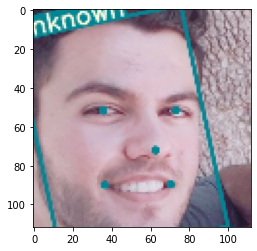

In [5]:
faces, boxes, scores, landmarks = detector.detect_align(img)
plt.imshow(faces.cpu()[0]);

# AgeGenderEstimator

- with high-level API (WebcamAgeGenderEstimator)

In [9]:
from facelib import WebcamAgeGenderEstimator

estimator = WebcamAgeGenderEstimator()

loading ...
from FaceDetector: weights loaded
from AgeGenderEstimator: download defualt weight started


5.17MiB [00:04, 1.06MiB/s]

the default model weight donwloaded
from AgeGenderEstimator: weights loaded


In [43]:
# please wait: it shows a window  
estimator.run()

type q for exit


- with low-level API(FaceDetector)

In [10]:
import matplotlib.pyplot as plt
from facelib import AgeGenderEstimator, FaceDetector

img = plt.imread('facelib/imgs/face_rec.jpg')
face_detector = FaceDetector()
age_gender_detector = AgeGenderEstimator()

from FaceDetector: weights loaded
from AgeGenderEstimator: weights loaded


In [73]:
faces, boxes, scores, landmarks = face_detector.detect_align(img)
genders, ages = age_gender_detector.detect(faces)
print(genders, ages)

['Male', 'Male'] [12, 11]


# FacialExpression

- with high-level API (WebcamAgeGenderEstimator)

In [1]:
from facelib import WebcamEmotionDetector

detector = WebcamEmotionDetector()

loading ...
from FaceDetector: weights loaded
from EmotionDetector: weights loaded


In [71]:
# please wait: it shows a window
detector.run()

type q for exit


- with low-level API(FaceDetector)

In [74]:
import matplotlib.pyplot as plt
from facelib import FaceDetector, EmotionDetector

img = plt.imread('facelib/imgs/face_rec.jpg')
face_detector = FaceDetector(face_size=(224, 224))
emotion_detector = EmotionDetector()

from FaceDetector: weights loaded
from EmotionDetector: weights loaded


In [75]:
faces, boxes, scores, landmarks = face_detector.detect_align(img)
list_of_emotions, probab = emotion_detector.detect_emotion(faces)
print(list_of_emotions)

['happy' 'happy']


# Add New Person

In [3]:
from facelib import add_from_webcam

add_from_webcam(person_name='sajjad')

loading ...
for exit: use q keyword
from FaceDetector: weights loaded
type q for exit
images saved in this path:  facelib/InsightFace/models/data/facebank/sajjad


In [98]:
from facelib import add_from_folder

add_from_folder(person_name='sajjad', folder_path='./test/')

only a face in each image and all image from the same person
loading ...
from FaceDetector: weights loaded
images saved in this path:  facelib/InsightFace/models/data/facebank/sajjad


# FaceRecognition

- with high-level API (WebcamVerify)

In [4]:
from facelib import WebcamVerify

verifier = WebcamVerify()

loading ...
from FaceDetector: weights loaded
from FaceRecognizer: download defualt weight started


4.94MiB [00:04, 1.05MiB/s]


the default model weight donwloaded
from FaceRecognizer: MobileFaceNet Loaded
from FaceRecognizer: facebank updated


In [6]:
# please wait: it shows a window
verifier.run()

type q for exit


- with low-level API(FaceRecognizer)

In [7]:
import matplotlib.pyplot as plt
from facelib import FaceRecognizer, FaceDetector
from facelib import update_facebank, load_facebank, special_draw, get_config

conf = get_config()
detector = FaceDetector()
face_rec = FaceRecognizer(conf)
face_rec.model.eval()

update = True
if update:
    targets, names = update_facebank(conf, face_rec.model, detector)
else:
    targets, names = load_facebank(conf)

from FaceDetector: weights loaded
from FaceRecognizer: MobileFaceNet Loaded
from FaceRecognizer: facebank updated


In [8]:
img = plt.imread('facelib/imgs/face_rec.jpg')

faces, boxes, scores, landmarks = detector.detect_align(img)
results, score = face_rec.infer(conf, faces, targets)
names[results.cpu()]

array(['sajjad', 'Unknown'], dtype='<U7')